# Методы понижения дисперсии: Стратификация и CUPED

*Подготовил Ян Пиле*

К настоящему моменту мы разобрали довольно много различных статистических тестов (особенно на прошлой лекции). Давайте вспомним чего ради мы все это затеяли.

Все методы, на самом деле, вам нужны, чтобы отвечать на вопрос "является ли отличие в двух измеренных показателях статистически значимым?", то есть "насколько вероятно было бы получить такой или еще более экстремальный результат случайно". С точки зрения АБ-тестов это можно переформулировать как "повлияло ли мое изменение на целевые метрики". Мы увидели, что различные статистические тесты обладают разной чувствительностью и договорились из подходящих методов выбирать тот, у которого чувствительность выше. На самом деле, нетрудно вспомнить, что качество статистической оценки зависит от дисперсии измеряемого показателя в группах. Вспомним, например, построение доверительных интервалов с помощью ЦПТ:

$$P(\overline{X_n}-z_{1-\frac{\alpha}{2}}\dfrac{\sigma}{\sqrt{n}} \le \mu \le \overline{X_n}+z_{1-\frac{\alpha}{2}}\dfrac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Тут мы говорили, что на выборке бОльшего размера доверительный интервал становится уже (в самом деле, там же корень из длины выборки в знаменателе). Это означает, что мы будем точнее оценивать нашу величину, если в выборке, по которой производится оценка, будет больше наблюдений. В реальной жизни мы почти никогда не можем неограниченно увеличивать *n*. Представьте, что вы проводите эксперимент, связанный с тем, как ваши пользователи кликают в рекламные баннеры. Представим, что в среднем на ваш сайт заходит 5000 уникальных пользователей в день. Вы подсчитали минимальный эффект, который вы хотите детектировать с помощью АБ-теста и посмотрели, на каком размере выборки вам это удастся: оказалось, что необходимо 150000 пользователей. Все? вам надо проводить свой эксперимент на всех пользователях не менее двух месяцев (если вы всех своих пользователей поделите пополам)?

Кроме того, чем меньше эффект, тем сложнее его будет обнаруживать. Представьте, например, что ваш продукт - ecom-сайт со средней конверсией около 2%. Если воспользоваться [калькулятором](https://bookingcom.github.io/powercalculator/) АБ-тестов от Booking, видно, что для обнаружения относительного изменения конверсии на 1% потребуется эксперимент с более чем 12 миллионами пользователей (с методологией расчета лучше ознакомиться непосредственно на GitHub'e, но порядок величин уж точно похож на правду. 

Проблема обнаружения небольших эффектов в эксперименте связана с низкой статистической мощностью. При низкой мощности статистический тест, скорее всего, сообщат о незначимой разнице между тестом и контролем, даже если изменение имеет быть. Мощность недостаточна, если эффект мал по сравнению с дисперсией измеряемого показателя для вашего размера выборки.

На самом деле, вместо того, чтобы наращивать выборку, мы могли бы начать измерять метрику как-то по-другому, чтобы понизить ее дисперсию. Давайте разберемся, как это сделать.

## Откуда дисперсия в экспериментальных данных

Дисперсия характеризует разброс данных. Частична она вызвана эффектом, который мы привнесли с помощью эксперимента в измеряемый показатель, а частично - просто поведением метрики самой по себе (дисперсия была и до эксперимента). Давайте попробуем посмотреть, как ее можно "убавить".



## Стратификация

Пусть у нас есть некоторая величина $Y$, у которой мы хотим оценить мат.ожидание $E(Y)$. Как бы мы стали это делать по умолчанию? Ну, можно было бы взять *n* независимых измерений жтой величины и потом по выборке посчитать среднее. При этом получиласт бы величина $\overline{Y}$ с дисперсией примерно $var(\overline{Y})=\dfrac{var(Y)}{n}$

Представим, что в наших наблюдениях есть явная стратификация (например по возрасту: младший, средний и старший) и мы явным образом можем семплировать наших пользователей из каждого возраста (удостовериться, что в эксперименте пропорции страт будут как в генеральной совокупности). Тогда если вероятность того, что пользователь окажется в страте номер $k$ равна $w_k$ и для выборки длины *n* мы хоти достать $w_k*n$ пользователей, можно определить новую величину:

$$\overline{Y}_{stratified} = \sum_k{w_k \overline{Y}_k}$$

где $\overline{Y}_k$ - среднее внутри страты номер *k*. Что интересно, такая оценка будет иметь дисперсию НЕ БОЛЬШЕ, чем исходная:

$$var(\overline{Y})=\sum_k{w_k\dfrac{\sigma^2_k}{n}}+\sum_k{w_k\dfrac{(\mu_k - \mu)^2}{n}} \ge \sum_k{w_k\dfrac{\sigma^2_k}{n}} = var(\overline{Y}_{stratified})$$

На самом деле, здесь мы УЖЕ использовали предэкспериментальные данные. Мы "объяснили" часть дисперсии с помощью категориальной переменной, которая маркировала наши страты. Посмотрим на прмер.

##  Пример

Пусть есть некий показатель, распределенный нормально в трех различных стратах:

* В первой - со средним 30 и дисперсией 200 (размер страты 5000)
* Во второй - со средним 20 и дисперсией 20 (размер страты 50000)
* В третьей - со средним 40 и дисперсией 5 (размер страты 5000)

In [38]:
import numpy as np

strata_1 = np.random.normal(30, 200, 5000)
strata_2 = np.random.normal(20, 20, 50000)
strata_3  = np.random.normal(43, 5, 5000)
total_data = np.concatenate((strata_1, strata_2, strata_3))

Давайте извлечем из нашей генеральной совокупности 200 выборок по 6000 наблюдений каждая в двух вариантах:

* Стратифицированном
* Нестратифицированном

На каждой из выборок посчитаем дисперсию и среднее и усредним эти показатели, а потом посмотрим, где дисперсия оказалась больше и насколько.

In [39]:
5000/(50000+5000+5000)

0.08333333333333333

In [40]:
sample = np.random.choice(total_data, n_samples, False)

In [41]:
total_data.shape

(60000,)

In [42]:
standard_mean = []
stratified_mean = []

n_samples = 200
sample_size = 1000


for i in range(n_samples):
    res = []
    sample = np.random.choice(total_data, n_samples, False)
    standard_mean += [np.mean(sample)]
    
    for _ in range(sample_size):
        random = np.random.random()
        if random  < 5000/(50000+5000+5000):
            res.append(np.random.choice(strata_1,replace = False))
        elif random  > 5000/(50000+5000+5000) and random < (5000+50000)/(50000+5000+5000):
            res.append(np.random.choice(strata_2,replace = False))
        else:
            res.append(np.random.choice(strata_3,replace = False))
    stratified_mean += [np.mean(res)]

In [43]:
print('Среднее', np.mean(standard_mean))
print('Стратифицированное среднее', np.mean(stratified_mean))

print('Дисперсия среднего на стандартных выборках', np.var(standard_mean))
print('Дисперсия среднего на стратифицированных выборках', np.var(stratified_mean))

Среднее 23.14955729519615
Стратифицированное среднее 22.77460641238968
Дисперсия среднего на стандартных выборках 19.19157391103216
Дисперсия среднего на стратифицированных выборках 3.764424070935328


Как видите, в данном случае стратификация понизила дисперсию. Попробуйте теоретически оценить, насколько понизится дисперсия показателя, если взять обычную выборку и стратифицированную выборку длины 7000.

## CUPED

also known as **C**ontrolled Experiment **u**sing **P**re-**E**xperimental **D**ata

Часть дисперсии, которую могут объяснить данные до эксперимента, не связана с нашим влиянием и, следовательно, может быть из эксперимента удалена. Давайте представим, что мы booking.com и проводим рекламный эксперимент с объектами недвижимости в попытке увеличить количество бронирований в день. Количество бронирований на один объект недвижимости может существенно разниться (например от нуля до тысяч), поэтому дисперсия показателя может оказаться существенной. Часто мы знаем среднее количество бронирований в день до эксперимента., тогда можно сразу проверять, начинают ли объекты получать больше, меньше или столько же бронирований по сравнению со своим средним результатом до эксперимента. Разброс в такой метрике будет существенно меньше.


Давайте сделаем шаг назад и посмотрим, как нам могут помочь так называемые контрольные переменные (то, с помощью чего мы собрались понижать дисперсию).

Представим, что мы измеряем метрику $Y$. Допустим, что помимо нее у нас есть еще одна случайная величина $X$, у которой нам хорошо известно мат.ожидание. Допустим, что мы хотим по выборке считать $\overline{Y}$. Сконструируем выборку из пар $(Y_i, X_i)$ (например значение метрики в эксперименте, значение метрики до эксперимента) и построим такую величину:

$$\hat Y_{cv} = \overline Y - \theta\overline X +\theta E(X)$$

Здесь $\theta$ - какое-то число. Нетрудно догадаться, что $\hat Y_{cv}$ - несмещенная оценка для $E(Y)$, потому что:

$$E(\hat Y_{cv}) = E(\overline Y) - E(\theta\overline X) +E(\theta E(X)) = E(\overline Y)$$

Тогда:

$$var(\hat Y_{cv}) = var(\overline Y - \theta\overline X) = \dfrac{1}{n}(var(Y)+\theta^2var(X)-2\theta cov(Y,X))$$

Это выражение будет минимальным, если выбрать:
$$\theta = \dfrac{cov(Y,X)}{var{X}}$$

Отлично, так и сделаем. При таком выборе наша дисперсия будет равна:

$$var(\hat Y_{cv}) = var(\overline Y)(1-\rho^2)$$

где $\rho$- коэффициент корреляции *Y* и *X*. 

Все это означает, чт если мы найдем такой *X*, что он будет сильно скоррелирован с *Y*, с помощью него мы сможем значительно уменьшить дисперсию.

<img src = "https://miro.medium.com/max/1400/1*pGrlReRtxpgzgRT6sBZxTA.png">

## Пример.

Представим, что мы - голосовой помощник. Мы выкатили новый диалоговый алгоритм в приложение на платформу iOS и хотим проверить, стали ли наши пользователи в среднем "болтать" с приложением больше.Для этого решили измерить количество фраз на пользователя в среднем в неделю.  В группе "EXP1" наша новая функциональность есть, а в группе "ВASE" ее нет. Также у нас есть данные до эксперимента. Давайте посмотрим, какой мы получим результат и поможет ли нам здесь CUPED.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import *
from matplotlib import pyplot

In [6]:
df = pd.read_csv('queries_per_user.csv')

In [17]:
df

,exp_group,device_id,phrases,phrases_before,phrases_cuped
0,BASE,ad68df2359662fc8a99112ecd31838d7646481f315c53c...,9.5,17.0,13.595540
1,BASE,b61bf9ed4ae252da9a6138f19b32cc16bf0639acff04b3...,7.0,61.5,-13.364643
2,BASE,0922c55342bd645766027096c655b6f1f69851b5dcfc08...,1.0,21.0,2.896872
3,BASE,c29ab1227a2afae958fac359d43e688b4bdd9ab69eb8ee...,24.0,124.5,-30.993665
4,EXP1,b59961af39afcd14b0670dce745dd219dc8b88a25cfba7...,11.0,0.5,24.165046
...,...,...,...,...,...
73079,BASE,710490b86f2281e7e89f2546bdcff17a1ce2f69d8e8ee8...,4.0,16.5,8.370373
73080,BASE,d6f33474c336960bea171fe5f684f74873f6fcab9aca27...,2.0,24.5,1.973037
73081,BASE,9ebf730e676179e8b6058d0a4d39e300ceed0ffbbc72db...,3.0,0.5,16.165046
73082,BASE,7a4e50f7d32a2036655a205874eff13ec8dd1f7c27e9e1...,1.0,2.5,13.065712


Глянем, нормальное ли у нас распределение

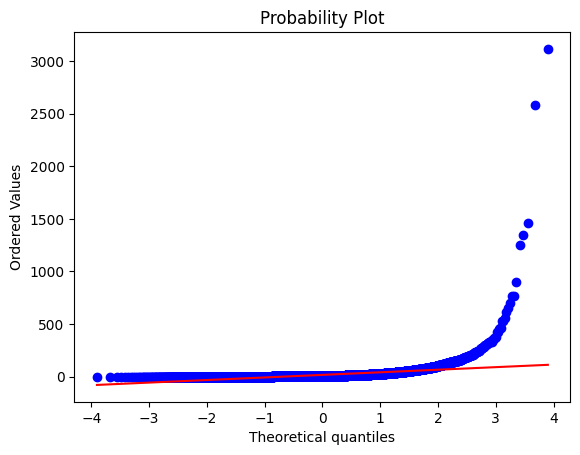

In [8]:
f = stats.probplot(df[df.exp_group == 'EXP1'].phrases, dist="norm", plot=pyplot)

Не особо. Ну и ладно, мы же про нормальность при выводе CUPED нигде не говорили.

In [9]:
metric = df.phrases.values
covariate = df.phrases_before.values

cov = np.mean((metric*covariate)) - np.mean(covariate)*np.mean(metric) 


In [10]:
cov

2303.7802148867395

In [11]:
theta = cov / np.var(covariate)
mean_cov = np.mean(covariate)
df['phrases_cuped'] = df.phrases - (df.phrases_before - mean_cov) * theta

Теперь считаем дисперсию :)

In [12]:
cuped_exp_2  = df.phrases_cuped[df.exp_group=='EXP1']
exp_2 = df.phrases[df.exp_group=='EXP1']

In [13]:
print('Среднее CUPED-метрики', np.mean(cuped_exp_2))
print('Среднее',np.mean(exp_2))
print('')
print('Дисперсия CUPED-метрики', np.var(cuped_exp_2))
print('Дисперсия', np.var(exp_2))
print('')
print('Понизили дисперсию на', round((1 - np.var(cuped_exp_2)/np.var(exp_2))*100,1),'%')

Среднее CUPED-метрики 17.17973577188483
Среднее 17.10536266758336

Дисперсия CUPED-метрики 1698.399635602106
Дисперсия 2638.3768155182743

Понизили дисперсию на 35.6 %


А теперь важный вопрос: результат теста-то какой? Ниже привел данные по обеим группам.

In [14]:
df.groupby('exp_group').describe()

phrases                                                     \
             count       mean        std  min  25%  50%   75%     max   
exp_group                                                               
BASE       58539.0  15.607638  55.710418  0.5  2.0  5.5  15.0  9070.5   
EXP1       14545.0  17.105363  51.366898  0.5  2.0  6.0  17.0  3114.0   

          phrases_before             ...               phrases_cuped  \
                   count       mean  ...   75%     max         count   
exp_group                            ...                               
BASE             58539.0  24.484566  ...  24.5  8575.5       58539.0   
EXP1             14545.0  24.315641  ...  24.0  2558.0       14545.0   

                                                                              \
                mean        std         min        25%        50%        75%   
exp_group                                                                      
BASE       15.589158  41.906744 -755.085730   9.569041  14.115379  19.809192   
EXP1       17.179736  41.213061 -481.498368  10.367044  14.522704  21.042543   

                        
                   max  
exp_group               
BASE       4370.270326  
EXP1       1884.917574  

[2 rows x 24 columns]

(array([6.0000e+00, 1.1070e+03, 1.3391e+04, 3.1000e+01, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-481.49836774, -244.85677353,   -8.21517933,  228.42641487,
         465.06800907,  701.70960328,  938.35119748, 1174.99279168,
        1411.63438588, 1648.27598009, 1884.91757429]),
 <BarContainer object of 10 artists>)

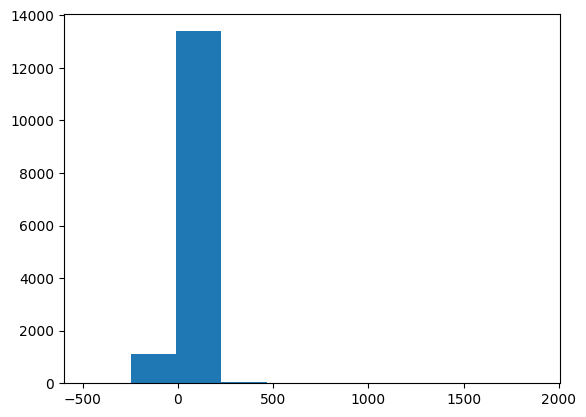

In [16]:
import matplotlib.pyplot as plt
plt.hist(cuped_exp_2)